In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd



In [6]:
df = pd.read_csv("./result/results_full_10.csv")


df_for_visualize = pd.DataFrame(
	{
    "Time (s)": df["with_scheduling"].tolist() + df["without_scheduling"].tolist(),
    "Optimization": ["on"] * len(df) + ["off"] * len(df),
    "Number of points": df["dataset_size"].tolist() + df["dataset_size"].tolist(),
    "dataset_dim": df["dataset_dim"].tolist() + df["dataset_dim"].tolist()
	}
)




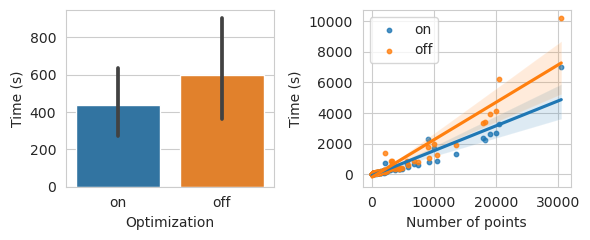

In [10]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(6, 2.5))

sns.barplot(
	data=df_for_visualize,
  y="Time (s)",
  x="Optimization",
	ax=ax[0]
)

sns.regplot(
  data=df_for_visualize[df_for_visualize["Optimization"] == "on"],
  x="Number of points",
  y="Time (s)",
  ax=ax[1],
	scatter_kws={"s": 10},
  label="on"
)

sns.regplot(
  data=df_for_visualize[df_for_visualize["Optimization"] == "off"],
  x="Number of points",
  y="Time (s)",
  ax=ax[1],
	scatter_kws={"s": 10},
  label="off"
)

ax[1].legend()


                                                                                                                                    



plt.tight_layout()

plt.savefig("./result/visualize.png", dpi=300)
plt.savefig("./result/visualize.pdf", dpi=300)


In [19]:
## statistical t-test between scheduling and non-scheduling

from scipy import stats

t, p = stats.ttest_ind(
	df["with_scheduling"].tolist(),
	df["without_scheduling"].tolist()
)

print(df["with_scheduling"].to_numpy().mean())
print(df["with_scheduling"].to_numpy().std())
print(df["without_scheduling"].to_numpy().mean())
print(df["without_scheduling"].to_numpy().std())

print("t: ", t)
print("p: ", p)

2802.3827248215675
1747.6453441909302
4309.980795145035
2627.925983951606
t:  -1.263860882026381
p:  0.22691940713272815


In [30]:
## perform one-way anova on scheduling and non-scheduling

from statsmodels.formula.api import ols

model = ols(data=df_for_visualize, formula="Time ~ C(Scheduling)").fit()

from statsmodels.stats.anova import anova_lm

anova_lm(model)


,df,sum_sq,mean_sq,F,PR(>F)
C(Scheduling),1.0,1.221452e+06,1.221452e+06,0.861163,0.354591
Residual,190.0,2.694915e+08,1.418376e+06,NaN,NaN
